In [ ]:
# pip install yfinance
# pip install python-bcb==0.3.3

In [1]:
# BIBLIOTECAS

import yfinance as yf
from datetime import date
import pandas as pd

In [6]:
comeco = "2016-01-01"
final = "2025-06-25"
# final = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset
def carregar_base(ticker):
    data = yf.download(ticker, comeco, final)
    data = data.rename(columns={'Close': 'Close'})
    data.reset_index(inplace=True)
    return data

# Remover Multindex dos DataFrames
def achatar_colunas(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join([str(c) for c in col if c]).strip() for col in df.columns]
    return df

In [8]:
df = carregar_base('ABEV3.SA')
df.head(100)

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,ABEV3.SA,ABEV3.SA,ABEV3.SA,ABEV3.SA,ABEV3.SA
0,2016-01-04,11.946371,12.307331,11.946371,12.307331,13206900
1,2016-01-05,12.133791,12.161558,11.876955,11.974136,10774200
2,2016-01-06,12.015787,12.133793,11.939431,12.050496,7739100
3,2016-01-07,11.696476,12.022727,11.696476,11.918605,15316400
4,2016-01-08,11.849188,11.939428,11.752007,11.752007,10684000
...,...,...,...,...,...,...
95,2016-05-23,12.889981,12.938913,12.799108,12.806098,8850200
96,2016-05-24,13.064736,13.099687,12.882990,12.966872,7050400
97,2016-05-25,13.267454,13.400269,13.057748,13.106679,21104900


In [ ]:
df.columns # Nome das colunas

MultiIndex([(  'Date',         ''),
            ( 'Close', 'ABEV3.SA'),
            (  'High', 'ABEV3.SA'),
            (   'Low', 'ABEV3.SA'),
            (  'Open', 'ABEV3.SA'),
            ('Volume', 'ABEV3.SA')],
           names=['Price', 'Ticker'])

In [ ]:
# Carregar Variáveis Extras

# Dólar
dolar = carregar_base('USDBRL=X')
dolar = achatar_colunas(dolar)
dolar = dolar[['Date', 'Close_USDBRL=X']].rename(columns={'Close_USDBRL=X': 'Close_Dolar'})

# Barril de Petróleo Brent
brent = carregar_base('BZ=F')
brent = achatar_colunas(brent)
brent = brent[['Date', 'Close_BZ=F']].rename(columns={'Close_BZ=F': 'Close_Petroleo'})

# Índice da Ibovespa
ibov = carregar_base('^BVSP')
ibov = achatar_colunas(ibov)
ibov = ibov[['Date', 'Close_^BVSP']].rename(columns={'Close_^BVSP': 'Close_Ibovespa'})

# Taxa Selic
selic = sgs.get(11, start=comeco, end=final)
selic = selic.reset_index()
selic.columns = ['Date', 'Close_Selic']

# IPCA Mensal (série 433)
ipca = sgs.get({'Close_IPCA': 433}, start=comeco, end=final)
ipca = ipca.reset_index()
ipca.columns = ['Date', 'Close_IPCA']
ipca['AnoMes'] = pd.to_datetime(ipca['Date']).dt.to_period('M')
df['AnoMes'] = pd.to_datetime(df['Date']).dt.to_period('M')

# Minério (Empresa Mineradora Global)
minerio = carregar_base('RIO')  # Empresa mineradora global
minerio = achatar_colunas(minerio)
minerio = minerio[['Date', 'Close_RIO']].rename(columns={'Close_RIO': 'Close_Minerio'})

# Energia Elétrica no IPCA (código 188)
energia = sgs.get({'energia_ipca': 188}, start=comeco, end=final)
energia = energia.reset_index()
energia.columns = ['Date', 'Close_Energia']
energia['AnoMesE'] = pd.to_datetime(energia['Date']).dt.to_period('M')
df['AnoMesE'] = pd.to_datetime(df['Date']).dt.to_period('M')

# Produção Industrial (Proxy de Consumo) - série 21859
consumo = sgs.get({'Close_Consumo': 21859}, start=comeco, end=final)
consumo = consumo.reset_index()
consumo.columns = ['Date', 'Close_Consumo']
consumo['AnoMesP'] = pd.to_datetime(consumo['Date']).dt.to_period('M')
df['AnoMesP'] = pd.to_datetime(df['Date']).dt.to_period('M')

energia.head(20)

/tmp/ipython-input-319-143464857.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, comeco, final)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-319-143464857.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, comeco, final)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-319-143464857.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, comeco, final)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-319-143464857.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, comeco, final)
[*********************100%***********************]  1 of 1 completed


,Date,Close_Energia,AnoMesE
0,2016-01-01,1.51,2016-01
1,2016-02-01,0.95,2016-02
2,2016-03-01,0.44,2016-03
3,2016-04-01,0.64,2016-04
4,2016-05-01,0.98,2016-05
5,2016-06-01,0.47,2016-06
6,2016-07-01,0.64,2016-07
7,2016-08-01,0.31,2016-08
8,2016-09-01,0.08,2016-09
9,2016-10-01,0.17,2016-10


In [ ]:
df = achatar_colunas(df)

df = df.merge(dolar, on='Date', how='inner') # o right basicamente remove a linha caso a data nao bata no merge
df = df.merge(brent, on='Date', how='inner')
df = df.merge(ibov, on='Date', how='inner')
df = df.merge(selic, on='Date', how='inner')
df = pd.merge(df, ipca[['AnoMes', 'Close_IPCA']], on='AnoMes', how='left') # usa o left porque o ipca eh dado uma vez por mes, entao é para manter as colunas que estiverem nulas como nulas
df = df.merge(minerio, on='Date', how='left')
df = pd.merge(df, energia[['AnoMesE', 'Close_Energia']], on='AnoMesE', how='left')
df = pd.merge(df, consumo[['AnoMesP', 'Close_Consumo']], on='AnoMesP', how='left')

df.drop(columns=['AnoMes'], inplace=True)
df.drop(columns=['AnoMesE'], inplace=True)
df.drop(columns=['AnoMesP'], inplace=True)

# Preencher os dias com o valor do mês correspondente
df['Close_IPCA'] = df['Close_IPCA'].fillna(method='ffill')
df['Close_Energia'] = df['Close_Energia'].fillna(method='ffill')
df['Close_Consumo'] = df['Close_Consumo'].fillna(method='ffill')

df.head(200)

/tmp/ipython-input-323-1981840928.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close_IPCA'] = df['Close_IPCA'].fillna(method='ffill')
/tmp/ipython-input-323-1981840928.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close_Energia'] = df['Close_Energia'].fillna(method='ffill')
/tmp/ipython-input-323-1981840928.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close_Consumo'] = df['Close_Consumo'].fillna(method='ffill')


,Date,Close_ABEV3.SA,High_ABEV3.SA,Low_ABEV3.SA,Open_ABEV3.SA,Volume_ABEV3.SA,Close_Dolar,Close_Petroleo,Close_Ibovespa,Close_Selic,Close_IPCA,Close_Minerio,Close_Energia,Close_Consumo
0,2016-01-04,11.946370,12.307330,11.946370,12.307330,13206900,3.9491,37.220001,42141.0,0.052531,1.27,13.606014,1.51,88.9
1,2016-01-05,12.133791,12.161558,11.876955,11.974136,10774200,4.0373,36.419998,42419.0,0.052531,1.27,13.720953,1.51,88.9
2,2016-01-06,12.015784,12.133790,11.939428,12.050493,7739100,4.0269,34.230000,41773.0,0.052531,1.27,12.945110,1.51,88.9
3,2016-01-07,11.696475,12.022726,11.696475,11.918604,15316400,4.0199,33.750000,40695.0,0.052531,1.27,12.360830,1.51,88.9
4,2016-01-08,11.849187,11.939427,11.752006,11.752006,10684000,4.0415,33.549999,40612.0,0.052531,1.27,12.006434,1.51,88.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2016-10-21,13.898838,13.976250,13.722903,13.842539,21287800,3.1391,51.779999,64108.0,0.051660,0.26,16.596724,0.17,105.1
196,2016-10-24,13.863650,13.941061,13.821425,13.877724,10105400,3.1489,51.459999,64060.0,0.051660,0.26,16.722952,0.17,105.1
197,2016-10-25,13.744013,13.842536,13.701788,13.807349,9277400,3.1245,50.790001,63866.0,0.051660,0.26,17.227871,0.17,105.1
198,2016-10-26,13.751054,13.807353,13.631418,13.715866,9041700,3.1104,49.980000,63826.0,0.051660,0.26,17.273314,0.17,105.1


In [ ]:
# df.columns = [f"{col[0]}_{col[1]}" if col[1] != '' else col[0] for col in df.columns]
# df.columns = [col.replace('Close_Dolar_USDBRL=X', 'Close_Dolar').replace('Close_Petroleo_BZ=F', 'Close_Petroleo').replace('Close_Ibovespa_^BVSP', 'Close_Ibovespa') for col in df.columns]
# df.columns

In [ ]:
df.tail()

,Date,Close_ABEV3.SA,High_ABEV3.SA,Low_ABEV3.SA,Open_ABEV3.SA,Volume_ABEV3.SA,Close_Dolar,Close_Petroleo,Close_Ibovespa,Close_Selic,Close_IPCA,Close_Minerio,Close_Energia,Close_Consumo
2280,2025-06-17,13.47,13.75,13.40,13.73,32452200,5.4908,76.449997,138840.0,0.054266,0.26,57.009998,0.35,99.4
2281,2025-06-18,13.49,13.55,13.35,13.38,37567000,5.4930,76.699997,138717.0,0.054266,0.26,56.939999,0.35,99.4
2282,2025-06-20,13.53,13.55,13.37,13.41,39451400,5.4900,77.010002,137116.0,0.055131,0.26,55.889999,0.35,99.4
2283,2025-06-23,13.56,13.65,13.47,13.50,27562100,5.5184,71.480003,136551.0,0.055131,0.26,57.090000,0.35,99.4
2284,2025-06-24,13.51,13.65,13.43,13.58,26798300,5.4938,67.139999,137165.0,0.055131,0.26,57.189999,0.35,99.4


In [ ]:
df.head(10)

,Date,Close_ABEV3.SA,High_ABEV3.SA,Low_ABEV3.SA,Open_ABEV3.SA,Volume_ABEV3.SA,Close_Dolar,Close_Petroleo,Close_Ibovespa,Close_Selic,Close_IPCA,Close_Minerio,Close_Energia,Close_Consumo
0,2016-01-04,11.946370,12.307330,11.946370,12.307330,13206900,3.9491,37.220001,42141.0,0.052531,1.27,13.606014,1.51,88.9
1,2016-01-05,12.133791,12.161558,11.876955,11.974136,10774200,4.0373,36.419998,42419.0,0.052531,1.27,13.720953,1.51,88.9
2,2016-01-06,12.015784,12.133790,11.939428,12.050493,7739100,4.0269,34.230000,41773.0,0.052531,1.27,12.945110,1.51,88.9
3,2016-01-07,11.696475,12.022726,11.696475,11.918604,15316400,4.0199,33.750000,40695.0,0.052531,1.27,12.360830,1.51,88.9
4,2016-01-08,11.849187,11.939427,11.752006,11.752006,10684000,4.0415,33.549999,40612.0,0.052531,1.27,12.006434,1.51,88.9
5,2016-01-11,11.661765,12.001901,11.627058,11.932486,12772700,3.9932,31.549999,39950.0,0.052531,1.27,11.848391,1.51,88.9
6,2016-01-12,11.786716,11.828366,11.647886,11.758950,9573800,4.0504,30.860001,39514.0,0.052531,1.27,11.503571,1.51,88.9
7,2016-01-13,11.682592,11.974137,11.606235,11.883897,10709300,4.0252,30.309999,38944.0,0.052531,1.27,11.402998,1.51,88.9
8,2016-01-14,11.696475,11.758949,11.467405,11.758949,12325600,4.0141,31.030001,39500.0,0.052531,1.27,12.068694,1.51,88.9
9,2016-01-15,11.515997,11.592354,11.099505,11.557646,19870300,4.0059,31.010000,38569.0,0.052531,1.27,11.312005,1.51,88.9


In [ ]:
df.tail(10)

,Date,Close_ABEV3.SA,High_ABEV3.SA,Low_ABEV3.SA,Open_ABEV3.SA,Volume_ABEV3.SA,Close_Dolar,Close_Petroleo,Close_Ibovespa,Close_Selic,Close_IPCA,Close_Minerio,Close_Energia,Close_Consumo
2275,2025-06-10,13.80,14.10,13.73,14.07,23640900,5.5570,66.870003,136436.0,0.054266,0.26,59.470001,0.35,99.4
2276,2025-06-11,13.91,13.92,13.63,13.73,22849900,5.5721,69.769997,137128.0,0.054266,0.26,58.830002,0.35,99.4
2277,2025-06-12,13.80,13.89,13.74,13.75,14788400,5.5358,69.360001,137800.0,0.054266,0.26,58.680000,0.35,99.4
2278,2025-06-13,13.64,13.79,13.58,13.68,28248400,5.5373,74.230003,137213.0,0.054266,0.26,58.000000,0.35,99.4
2279,2025-06-16,13.68,13.85,13.59,13.66,27978300,5.5389,73.230003,139256.0,0.054266,0.26,58.310001,0.35,99.4
2280,2025-06-17,13.47,13.75,13.40,13.73,32452200,5.4908,76.449997,138840.0,0.054266,0.26,57.009998,0.35,99.4
2281,2025-06-18,13.49,13.55,13.35,13.38,37567000,5.4930,76.699997,138717.0,0.054266,0.26,56.939999,0.35,99.4
2282,2025-06-20,13.53,13.55,13.37,13.41,39451400,5.4900,77.010002,137116.0,0.055131,0.26,55.889999,0.35,99.4
2283,2025-06-23,13.56,13.65,13.47,13.50,27562100,5.5184,71.480003,136551.0,0.055131,0.26,57.090000,0.35,99.4
2284,2025-06-24,13.51,13.65,13.43,13.58,26798300,5.4938,67.139999,137165.0,0.055131,0.26,57.189999,0.35,99.4


In [ ]:
df.shape # Quantidade de linhas e colunas

(2285, 14)

In [ ]:
df.info() # Quantidade de dados nulos e tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2285 non-null   datetime64[ns]
 1   Close_ABEV3.SA   2285 non-null   float64       
 2   High_ABEV3.SA    2285 non-null   float64       
 3   Low_ABEV3.SA     2285 non-null   float64       
 4   Open_ABEV3.SA    2285 non-null   float64       
 5   Volume_ABEV3.SA  2285 non-null   int64         
 6   Close_Dolar      2285 non-null   float64       
 7   Close_Petroleo   2285 non-null   float64       
 8   Close_Ibovespa   2285 non-null   float64       
 9   Close_Selic      2285 non-null   float64       
 10  Close_IPCA       2285 non-null   float64       
 11  Close_Minerio    2283 non-null   float64       
 12  Close_Energia    2285 non-null   float64       
 13  Close_Consumo    2285 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64

In [ ]:
df.describe() # Estatísticas descritivas das colunas numéricas

,Date,Close_ABEV3.SA,High_ABEV3.SA,Low_ABEV3.SA,Open_ABEV3.SA,Volume_ABEV3.SA,Close_Dolar,Close_Petroleo,Close_Ibovespa,Close_Selic,Close_IPCA,Close_Minerio,Close_Energia,Close_Consumo
count,2285,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2283.000000,2285.000000,2285.000000
mean,2020-10-02 04:20:54.091903744,12.906666,13.059203,12.759111,12.906237,2.318716e+07,4.553637,68.072425,98617.361926,0.034492,0.425965,42.255384,0.423589,100.740569
min,2016-01-04 00:00:00,8.646994,8.788105,8.121743,8.411808,0.000000e+00,3.056100,19.990000,37497.000000,0.007469,-0.680000,10.871402,-0.600000,70.200000
25%,2018-05-22 00:00:00,11.963110,12.095695,11.820666,11.957943,1.410750e+07,3.724100,54.470001,78596.000000,0.024620,0.210000,28.200941,0.150000,94.400000
50%,2020-10-02 00:00:00,12.862018,13.019273,12.716945,12.858189,2.033570e+07,4.915400,69.029999,104089.000000,0.039270,0.380000,41.842041,0.370000,101.400000
75%,2023-02-14 00:00:00,13.765122,13.891799,13.616719,13.759082,2.876560e+07,5.320000,79.699997,118160.000000,0.049037,0.610000,58.611332,0.640000,106.300000
max,2025-06-24 00:00:00,18.010733,18.225940,17.832628,18.099783,1.440625e+08,6.300000,127.980003,140110.000000,0.055131,1.620000,69.016449,1.710000,114.500000
std,NaN,1.528126,1.519572,1.527593,1.524776,1.344850e+07,0.911694,18.305629,24779.536909,0.014990,0.392874,16.635501,0.423353,7.939634


In [ ]:
import matplotlib.pyplot as plt #exibir saída no seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

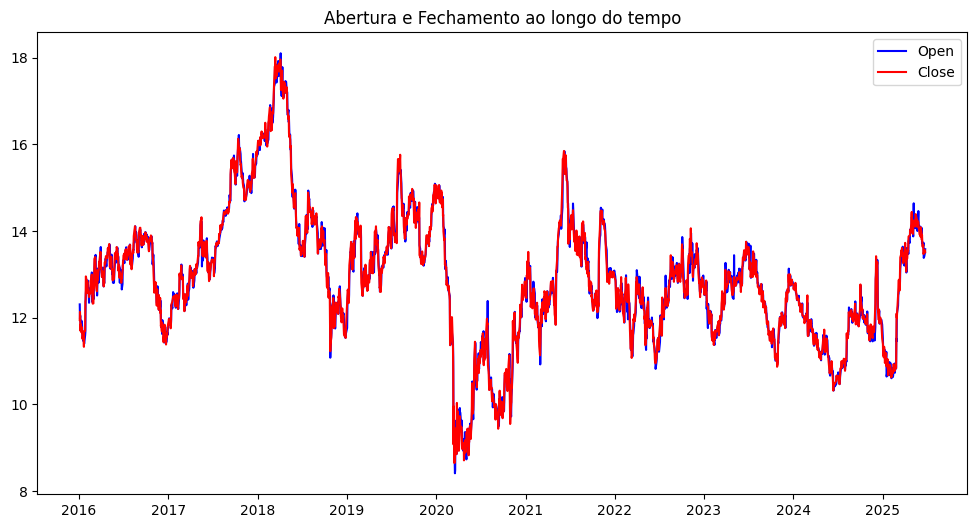

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Open_ABEV3.SA'], label = "Open", color="blue")
plt.plot(df['Date'], df['Close_ABEV3.SA'], label = "Close", color="red")
plt.title("Abertura e Fechamento ao longo do tempo")
plt.legend()
plt.show

In [ ]:
from tensorflow import keras #usado para construir e treinar a rede neural
from sklearn.preprocessing import StandardScaler #criar uma média e variância de nossos dados, para melhor entendimento de dados
import numpy as np #arrays 2d e 3d
import seaborn as sns #visualizações mais avançados do que o matplotlib

In [ ]:
#-----------------------------------
#Preparando o modelo de LSTM
#-----------------------------------

fechamento_acao = df['Close_ABEV3.SA']
fechamento_acao_numpy = df['Close_ABEV3.SA'].to_numpy()


fechamento_acao_array = fechamento_acao.values #converte os valores de fechamento da ação para um array numpy (vetor 1d)
fechamento_acao_array_2D = fechamento_acao_numpy.reshape(-1,1) #Converte para vetor 2d StandardScaler (e a maioria dos transformers do scikit-learn) espera receber um array 2D

fechamento_acao_array_2D


#num_amostras_treinamento = int(np.ceil(len(fechamento_acao_array) * 0.95)) #Obtendo 95% dos conjuntos de dados da ação
tamanho_amostras_treinamento = int(len(fechamento_acao_array) * 0.95) #Obtendo 95% dos conjuntos de dados de fechamento da ação (antes era 2285, agora é 2170)
tamanho_amostras_treinamento

2170

In [ ]:
#----------------------------------------
# Estágios de Preprocessamento do modelo (média e variância da matriz numpy)
#----------------------------------------

dimensionador = StandardScaler()
dados_dimensionados = dimensionador.fit_transform(fechamento_acao_array_2D)

dados_treinamento = dados_dimensionados[:tamanho_amostras_treinamento] #percorre até os 95% dos dados da ação

X_treinamento = [] #todos os recursos
Y_treinamento = [] #preço de fechamento da ação



#Seleciona-se, para cada passo, uma janela deslizante de 60 fechamentos anteriores como vetor de entrada. #Usa-se o valor imediatamente após essa janela como alvo a ser previsto pelo modelo.
#Repetindo isso ao longo de toda a série geram-se cerca de (N – 60) pares (X, Y) para treinar o LSTM.

for i in range(60 ,len(dados_treinamento)):
  X_treinamento.append(dados_treinamento[i - 60 : i, 0])
  Y_treinamento.append(dados_treinamento[i,0]) #alvo para o próximo valor

X_treinamento, Y_treinamento = np.array(X_treinamento), np.array(Y_treinamento)

X_treinamento = np.reshape(X_treinamento, (X_treinamento.shape[0], X_treinamento.shape[1]))

Y_treinamento


array([ 0.11261331,  0.07601044,  0.03940757, ..., -0.64606946,
       -0.69105682, -0.90313349])

In [ ]:
#----------------------------------------
# Construção do modelo
#----------------------------------------



modelo = keras.models.Sequential()

# Primeira camada

modelo.add(keras.layers.LSTM(64, return_sequences = True, input_shape=(X_treinamento.shape[1], 1)))

# Segunda camada

modelo.add(keras.layers.LSTM(64, return_sequences = False))

# Terceira camada (Densa)

modelo.add(keras.layers.Dense(128, activation='relu')) #128 neurônios

# Quarta camada (abandono)

modelo.add(keras.layers.Dropout(0.5))#elimina 50% dos dados

# Camada final

modelo.add(keras.layers.Dense(1)) #Apenas um neurônio para dar a resposta final

modelo.summary()
modelo.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError()])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
treinamento = modelo.fit(X_treinamento, Y_treinamento, epochs=20, batch_size=32) #epochs --> Quantas vezes o modelo será executado para retornar a melhor solução
                                                                                 #batch_size --> quantos exemplos de treino o modelo processa de uma vez antes de atualizar seus pesos.

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.4087 - root_mean_squared_error: 0.5594
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.2267 - root_mean_squared_error: 0.3092
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.1996 - root_mean_squared_error: 0.2698
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1879 - root_mean_squared_error: 0.2579
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1941 - root_mean_squared_error: 0.2669
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.1521 - root_mean_squared_error: 0.2090
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.1590 - root_mean_squared_error: 0.2222
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.1528 - root_mean_squared_error: 0.2150
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.1538 - root_mean_squared_error: 0.2152
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.1505 - root_mean_squared_error: 0.2116

In [ ]:
#----------------------------------------
# Preparação dos dados de teste
#----------------------------------------

dados_teste = dados_dimensionados[tamanho_amostras_treinamento - 60:]
X_teste = []
Y_teste = fechamento_acao_array[tamanho_amostras_treinamento:]

for i in range(60, len(dados_teste)):
  X_teste.append(dados_teste[i-60 : i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0] , X_teste.shape[1] , 1)) #remodela para uma matriz 3D

predicoes = modelo.predict(X_teste)
predicoes = dimensionador.inverse_transform(predicoes)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


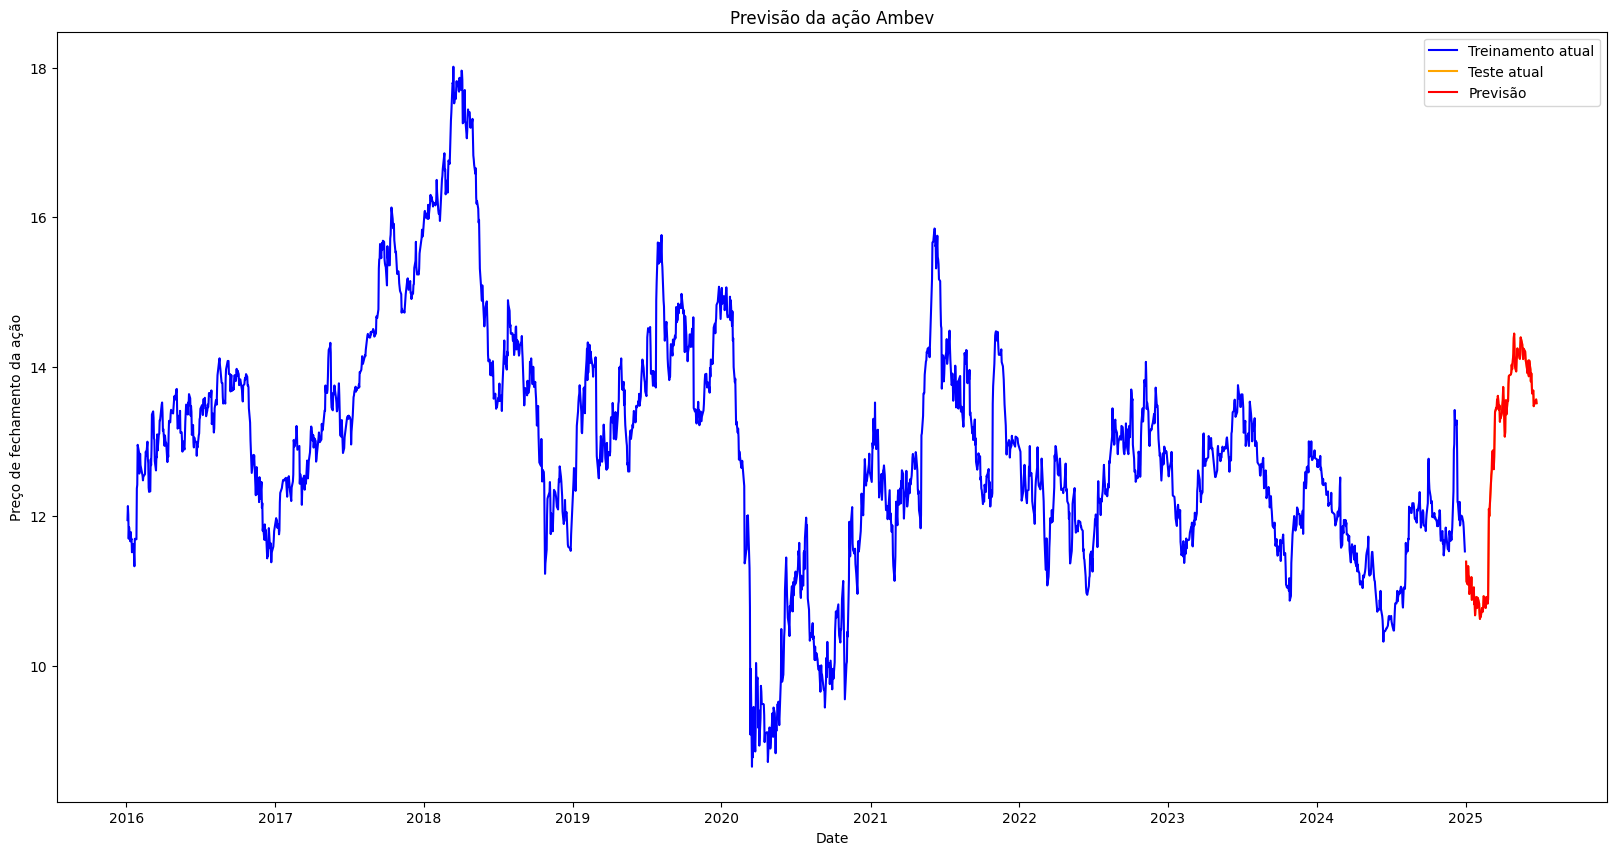

In [ ]:
#----------------------------------------
# Mostrando os dados
#----------------------------------------

treinamento = df[:tamanho_amostras_treinamento]
teste = df[tamanho_amostras_treinamento:] #os 5% restantes

teste = teste.copy()

teste['Previsoes'] = predicoes

plt.figure(figsize=(20,10))
plt.plot(treinamento['Date'] , treinamento["Close_ABEV3.SA"], label = 'Treinamento atual', color='blue')
plt.plot(teste['Date'] , teste["Close_ABEV3.SA"], label = 'Teste atual', color='orange')
plt.plot(teste['Date'] , teste["Close_ABEV3.SA"], label = 'Previsão', color='red')
plt.title("Previsão da ação Ambev")
plt.xlabel("Date")
plt.ylabel("Preço de fechamento da ação")
plt.legend()
plt.show()